# Analysis all atom protein for 1 ns

In [35]:
# Analysis of CHI1 and CHI2 all-atom 

In [36]:
# Import Python packages

In [37]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import axes
%matplotlib inline

import nglview as nv
import mdtraj as md

import plotly.express as px

In [38]:
# Import Python molecular dynamics tools

In [67]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align, diffusionmap
from MDAnalysis.analysis import dihedrals
from MDAnalysis.analysis import contacts
from MDAnalysis.analysis import helix_analysis as hel

In [40]:
# Import data

In [41]:
datadir = os.getcwd()

gro_chi1 = datadir+'/CHI1_AA_1000ps/md.gro'
xtc_chi1 = datadir+'/CHI1_AA_1000ps/md_center_system.xtc'
tpr_chi1 = datadir+'/CHI1_AA_1000ps/md.tpr'

gro_chi2 = datadir+'/CHI2_AA_1000ps/md.gro'
xtc_chi2 = datadir+'/CHI2_AA_1000ps/md_center_system.xtc'
tpr_chi2 = datadir+'/CHI2_AA_1000ps/md.tpr'

### Load trajectory for CHI1

In [42]:
u1 = mda.Universe(gro_chi1, xtc_chi1, in_memory= True)
p1 = u1.select_atoms('protein')
calpha1 = u1.select_atoms('name CA')

In [43]:
 print("Trajectory length="+str(len(u1.trajectory))+" frames.")

Trajectory length=201 frames.


In [44]:
w = nv.show_mdanalysis(p1)
w

NGLWidget(max_frame=200)

### Load trajectory for CHI2

In [45]:
u2 = mda.Universe(gro_chi2, xtc_chi2, in_memory= True)
p2 = u2.select_atoms('protein')
calpha2 = u2.select_atoms('name CA')

In [46]:
 print("Trajectory length="+str(len(u1.trajectory))+" frames.")

Trajectory length=201 frames.


In [47]:
w = nv.show_mdanalysis(p2)
w

NGLWidget(max_frame=200)

## Structural analysis of CHI1 and CHI2

### Radius of gyration

In [48]:
Rgyr1 = []
Rgyr2 = []
for ts in u1.trajectory:
    Rgyr1.append((u1.trajectory.time, p1.radius_of_gyration())) 
Rgyr1 = np.array(Rgyr1)

for ts in u2.trajectory:
     Rgyr2.append((u2.trajectory.time, p2.radius_of_gyration()))
Rgyr2 = np.array(Rgyr2)

df1 = pd.DataFrame(Rgyr1, columns = ['time', 'CHI1'])
df2 = pd.DataFrame(Rgyr2, columns = ['time', 'CHI2'])

df = [df1, df2]
df_tot = pd.concat([df1,df2])

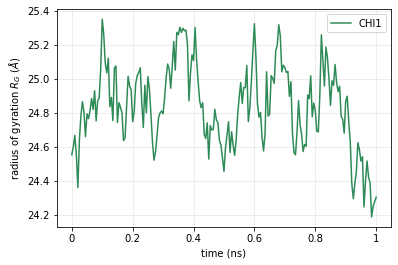

In [115]:
#CHI1
ax = plt.subplot(111)
ax.plot(Rgyr1[:,0], Rgyr1[:,1], color = '#2E8B57', lw=1.5, label='CHI1') 

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)") 
ax.legend()
ax.grid(color = '#DCDCDC', lw = 0.5)

plt.savefig('Rg_CHI1.png')

plt.draw()

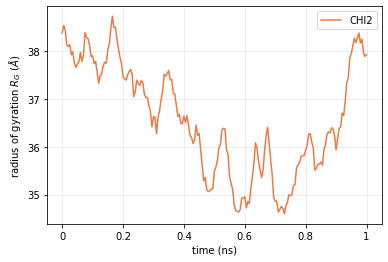

In [116]:
#CHI2
ax = plt.subplot(111)
ax.plot(Rgyr2[:,0], Rgyr2[:,1], '#EE7942', lw=1.5, label='CHI2')

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)") 
ax.legend()
ax.grid(color = '#DCDCDC', lw = 0.5)

plt.savefig('Rg_CHI2.png')
plt.draw()

### RMSD for CHI1

In [50]:
R1 = rms.RMSD(u1, # universe to align
              u1, # reference universe 
              select = 'protein', # group to superimpose and calculate the RMSD
              ref_frame = 0) # frame index for reference)

R1.run()

In [77]:
df1 = pd.DataFrame(R1.results.rmsd, columns = ['frame','time', 'CHI1'])
df1.head()

,frame,time,CHI1
0,0.0,0.0,6.879193e-07
1,1.0,5.0,1.272981e+00
2,2.0,10.0,1.638550e+00
3,3.0,15.0,1.962499e+00
4,4.0,20.0,2.069717e+00


Text(0, 0.5, 'RMSD ($\\AA$)')

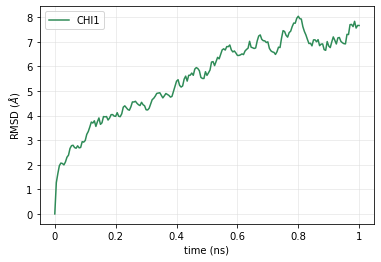

In [118]:
#plot with matplotlib
rmsd_1 = R1.results.rmsd.T
time = rmsd_1[1]
ax = plt.subplot(111)
ax.plot(time, rmsd_1[2], color = '#2E8B57', lw=1.5, label = "CHI1")
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.5)

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")

### RMSD for CHI2 

In [53]:
R2 = rms.RMSD(u2, # universe to align
              u2, # reference universe 
              select = 'protein', # group to superimpose and calculate the RMSD
              ref_frame = 0) # frame index for reference)

R2.run()

In [80]:
df2 = pd.DataFrame(R2.results.rmsd, columns = ['frame','time', 'CHI2'])
df2.head()

,frame,time,CHI2
0,0.0,0.0,0.000001
1,1.0,5.0,1.277283
2,2.0,10.0,1.662058
3,3.0,15.0,1.895190
4,4.0,20.0,2.111901


Text(0, 0.5, 'RMSD ($\\AA$)')

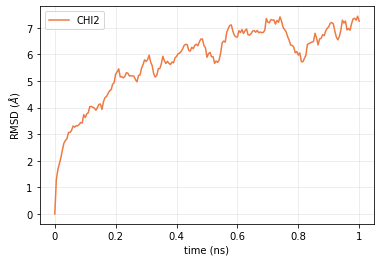

In [119]:
rmsd_2 = R2.results.rmsd.T
time = rmsd_2[1]
ax = plt.subplot(111)
ax.plot(time, rmsd_2[2],'#EE7942', lw=1.5 , label = "CHI2" )
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.5)

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)
ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")

### Alignment of trajectory to the first frame for CHI1 and CHI2

In [56]:
mobile1 = u1
ref1 = u1

mobile2 = u2
ref2 = u2

mobile1.trajectory[-1]
ref1.trajectory[0]

mobile2.trajectory[-1]
ref2.trajectory[0]

mobile1sel = mobile1.select_atoms('protein')
ref1sel = ref1.select_atoms('protein')

mobile2sel = mobile2.select_atoms('protein')
ref2sel = ref2.select_atoms('protein')

In [57]:
aligner1 = align.AlignTraj(mobile1, ref1,
                          select='protein',
                          in_memory=True).run()

aligner2 = align.AlignTraj(mobile2, ref2,
                          select='protein',
                          in_memory=True).run()

### Pairwise RMSD of a trajectory to itself for CHI1

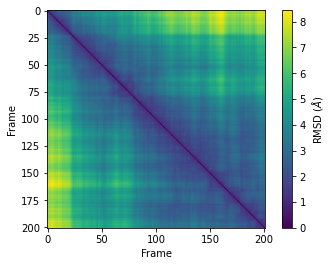

In [72]:
matrix = diffusionmap.DistanceMatrix(mobile1, select = 'protein').run()

plt.imshow(matrix.results.dist_matrix, cmap='viridis')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
#smaller configuration until abt frame 25 and after that the system explores different similar configurations. 

### Pairwise RMSD of a trajectory to itself for CHI2 

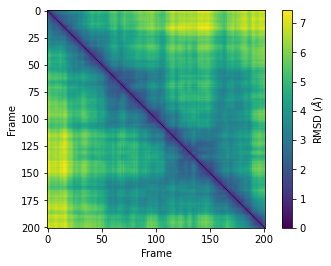

In [73]:
matrix = diffusionmap.DistanceMatrix(mobile2, select = 'protein').run()

plt.imshow(matrix.results.dist_matrix, cmap='viridis')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
#The protein explores different configurations during the simulation with a greater variability with respect to 
#CHI1. This can be due by the fact that the protein is less compact and has more "free fragments".

### RMSF for CHI1

In [59]:
RR_CHI1 = rms.RMSF(mobile1sel).run()
RR_CHI2 = rms.RMSF(mobile2sel).run()

In [60]:
resids_1=[]
for el in range(0,len(mobile1sel.resids)):
    num = int(mobile1sel.resids[el])
    if num >= 100000:
        num-=100000
    resids_1.append(num)

resids_2=[]
for el in range(0,len(mobile2sel.resids)):
    num = int(mobile2sel.resids[el])
    if num >= 100000:
        num-=100000
    resids_2.append(num)


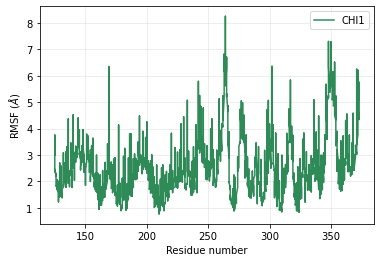

In [129]:
plt.plot(resids_1, RR_CHI1.results.rmsf, color = '#2E8B57', lw=1.5,label = "CHI1")
plt.grid(color = '#DCDCDC', lw = 0.5)

plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.legend()

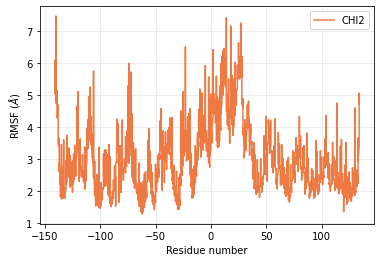

In [132]:
plt.plot(resids_2, RR_CHI2.rmsf, '#EE7942', lw=1.5, label = "CHI2")
plt.grid(color = '#DCDCDC', lw = 0.5)

plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.legend()

### Ramachandran plot of CHI1

/opt/anaconda3/envs/env_1fkc/lib/python3.10/site-packages/MDAnalysis/analysis/dihedrals.py:422: UserWarning:

Cannot determine phi and psi angles for the first or last residues

/opt/anaconda3/envs/env_1fkc/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:903: UserWarning:

Reader has no dt information, set to 1.0 ps



(1, 247, 2)


/opt/anaconda3/envs/env_1fkc/lib/python3.10/site-packages/MDAnalysis/analysis/dihedrals.py:528: DeprecationWarning:

The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead



<AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>

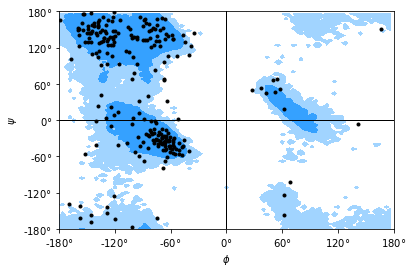

In [63]:
# Ramachandran of first frame
pdb_fr1 = datadir+'/CHI1_AA_1000ps/md_frame1.pdb'
pdb_fr201 = datadir+'/CHI1_AA_1000ps/md_frame201.pdb'

u1 = mda.Universe(pdb_fr1) 
u201 = mda.Universe(pdb_fr201)

p1 = u1.select_atoms('protein')
p201 = u201.select_atoms('protein')

rama1 = dihedrals.Ramachandran(p1).run()
print(rama1.angles.shape)

rama1.plot(color='black', marker='.', ref = True)

(1, 247, 2)


<AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>

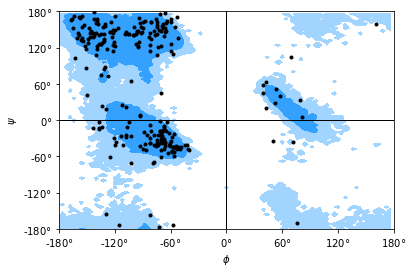

In [64]:
#ramachandran of last frame
rama201 = dihedrals.Ramachandran(p201).run()
print(rama201.angles.shape)

rama201.plot(color='black', marker='.', ref = True)
#put them together

### Ramachandran plot of CHI2

/opt/anaconda3/envs/env_1fkc/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:276: UserWarning:

PDB file is missing resid information.  Defaulted to '1'



(1, 274, 2)


<AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>

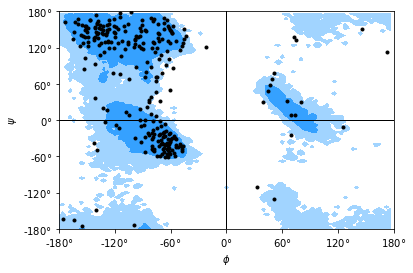

In [65]:
# Ramachandran of first frame
pdb_fr1 = datadir+'/CHI2_AA_1000ps/md_frame1.pdb'
pdb_fr201 = datadir+'/CHI2_AA_1000ps/md_frame201.pdb'

u1 = mda.Universe(pdb_fr1) 
u201 = mda.Universe(pdb_fr201)

p1 = u1.select_atoms('protein')
p201 = u201.select_atoms('protein')

rama1 = dihedrals.Ramachandran(p1).run()
print(rama1.angles.shape)

rama1.plot(color='black', marker='.', ref = True)

(1, 274, 2)


<AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>

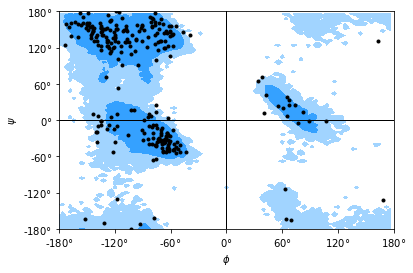

In [66]:
rama201 = dihedrals.Ramachandran(p201).run()
print(rama201.angles.shape)

rama201.plot(color='black', marker='.', ref = True)